In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [50]:
bfl_data = pd.read_csv("D:/archive/Training_set.csv")
bfl_data

,filename,label
0,Image_1.jpg,SOUTHERN DOGFACE
1,Image_2.jpg,ADONIS
2,Image_3.jpg,BROWN SIPROETA
3,Image_4.jpg,MONARCH
4,Image_5.jpg,GREEN CELLED CATTLEHEART
...,...,...
6494,Image_6495.jpg,MANGROVE SKIPPER
6495,Image_6496.jpg,MOURNING CLOAK
6496,Image_6497.jpg,APPOLLO
6497,Image_6498.jpg,ELBOWED PIERROT


In [51]:
class_seleccionados=  ['POPINJAY', 'APPOLLO', 'QUESTION MARK', 'BLACK HAIRSTREAK', 'GREAT EGGFLY']

In [52]:
class_seleccionados = np.unique(class_seleccionados)

In [72]:
class_names = np.unique(bfl_data['label'])

In [73]:
import pandas as pd
images = []
labels = []
# Recorrer todos los registros del DataFrame
for index, row in bfl_data.iterrows():
    image_path = row['filename']
    label = row['label']
    class_index = np.where(class_seleccionados == label)[0]
    if len(class_index) > 0:
        # Construir la ruta completa de la imagen
        image_path = 'D:/archive/train/{}'.format(image_path)
        
        # Leer la imagen y realizar las transformaciones necesarias
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        normalized_image = np.array(gray_image) / 255.0 
        resized_image = cv2.resize(normalized_image, (48, 48))
        
        # Agregar la imagen y la etiqueta al conjunto de datos
        images.append(resized_image)
        labels.append(class_index)
    
images = np.array(images)
labels = np.array(labels)

print("Forma de las imágenes:", images.shape)
print("Forma de las etiquetas:", labels.shape)

Forma de las imágenes: (415, 48, 48)
Forma de las etiquetas: (415, 1)


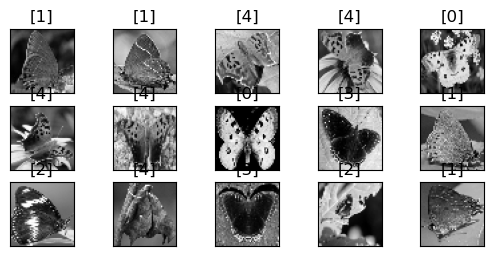

In [74]:
for i in range(15):
    plt.subplot(5, 5, i+1)
    plt.imshow(images[i], cmap='gray')  # Muestra cada imagen normalizada de la lista
    plt.title(labels[i])  # Agrega el título con la etiqueta correspondiente
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
plt.show()

In [152]:
from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento y pruebas
Imagenes_train, Imagens_test, labels_train, labels_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Imprimir la forma de los conjuntos de entrenamiento y pruebas
print("Forma de X_train:", Imagenes_train.shape)
print("Forma de X_test:", Imagens_test.shape)
print("Forma de y_train:", labels_train.shape)
print("Forma de y_test:", labels_test.shape)

Forma de X_train: (332, 48, 48)
Forma de X_test: (83, 48, 48)
Forma de y_train: (332, 1)
Forma de y_test: (83, 1)


In [76]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models

In [153]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2))
])

In [154]:
# Agregar capas completamente conectadas para clasificación
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))  # Capa de salida con 10 neuronas para clasificación de 10 clases

In [155]:
# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [156]:
model.fit(Imagenes_train, labels_train, epochs=100, batch_size=64, validation_split=0.3)

Epoch 1/100
4/4 [==============================] - 1s 92ms/step - loss: 1.6039 - accuracy: 0.2716 - val_loss: 1.6024 - val_accuracy: 0.2700
Epoch 2/100
4/4 [==============================] - 0s 41ms/step - loss: 1.5807 - accuracy: 0.2931 - val_loss: 1.5955 - val_accuracy: 0.3800
Epoch 3/100
4/4 [==============================] - 0s 41ms/step - loss: 1.5168 - accuracy: 0.4267 - val_loss: 1.5844 - val_accuracy: 0.3900
Epoch 4/100
4/4 [==============================] - 0s 39ms/step - loss: 1.4298 - accuracy: 0.4353 - val_loss: 1.4866 - val_accuracy: 0.3500
Epoch 5/100
4/4 [==============================] - 0s 40ms/step - loss: 1.3014 - accuracy: 0.4526 - val_loss: 1.3080 - val_accuracy: 0.4800
Epoch 6/100
4/4 [==============================] - 0s 41ms/step - loss: 1.1880 - accuracy: 0.4698 - val_loss: 1.2347 - val_accuracy: 0.4900
Epoch 7/100
4/4 [==============================] - 0s 43ms/step - loss: 1.0872 - accuracy: 0.5302 - val_loss: 1.0863 - val_accuracy: 0.4900
Epoch 8/100
4/4 [===

4/4 [==============================] - 0s 39ms/step - loss: 0.0423 - accuracy: 0.9914 - val_loss: 0.8196 - val_accuracy: 0.7900
Epoch 60/100
4/4 [==============================] - 0s 40ms/step - loss: 0.0396 - accuracy: 0.9914 - val_loss: 0.7909 - val_accuracy: 0.7900
Epoch 61/100
4/4 [==============================] - 0s 41ms/step - loss: 0.0385 - accuracy: 0.9914 - val_loss: 0.8241 - val_accuracy: 0.7800
Epoch 62/100
4/4 [==============================] - 0s 46ms/step - loss: 0.0328 - accuracy: 0.9914 - val_loss: 0.8054 - val_accuracy: 0.7600
Epoch 63/100
4/4 [==============================] - 0s 39ms/step - loss: 0.0324 - accuracy: 0.9914 - val_loss: 0.8500 - val_accuracy: 0.7900
Epoch 64/100
4/4 [==============================] - 0s 41ms/step - loss: 0.0314 - accuracy: 0.9914 - val_loss: 0.8836 - val_accuracy: 0.7600
Epoch 65/100
4/4 [==============================] - 0s 45ms/step - loss: 0.0254 - accuracy: 0.9914 - val_loss: 0.8584 - val_accuracy: 0.7800
Epoch 66/100
4/4 [========

In [157]:
test_loss, test_acc = model.evaluate(Imagens_test, labels_test)
print('Test accuracy:', test_acc)

3/3 [==============================] - 0s 9ms/step - loss: 1.6217 - accuracy: 0.7470
Test accuracy: 0.7469879388809204


In [83]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

# def plot_value_array(i, predictions_array, true_label):
#   predictions_array, true_label = predictions_array, true_label[i]
#   plt.grid(False)
#   plt.xticks(range(5))
#   plt.yticks([])
#   thisplot = plt.bar(range(5), predictions_array, color="#777777")
#   plt.ylim([0, 1])
#   predicted_label = np.argmax(predictions_array)

#   thisplot[predicted_label].set_color('red')
#   thisplot[true_label].set_color('blue')

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(5))
    plt.yticks([])
    thisplot = plt.bar(range(5), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[int(true_label)].set_color('blue')

# El resto de tu código permanece sin cambios


In [84]:
predictions = model.predict(Imagens_test)

3/3 [==============================] - 0s 7ms/step


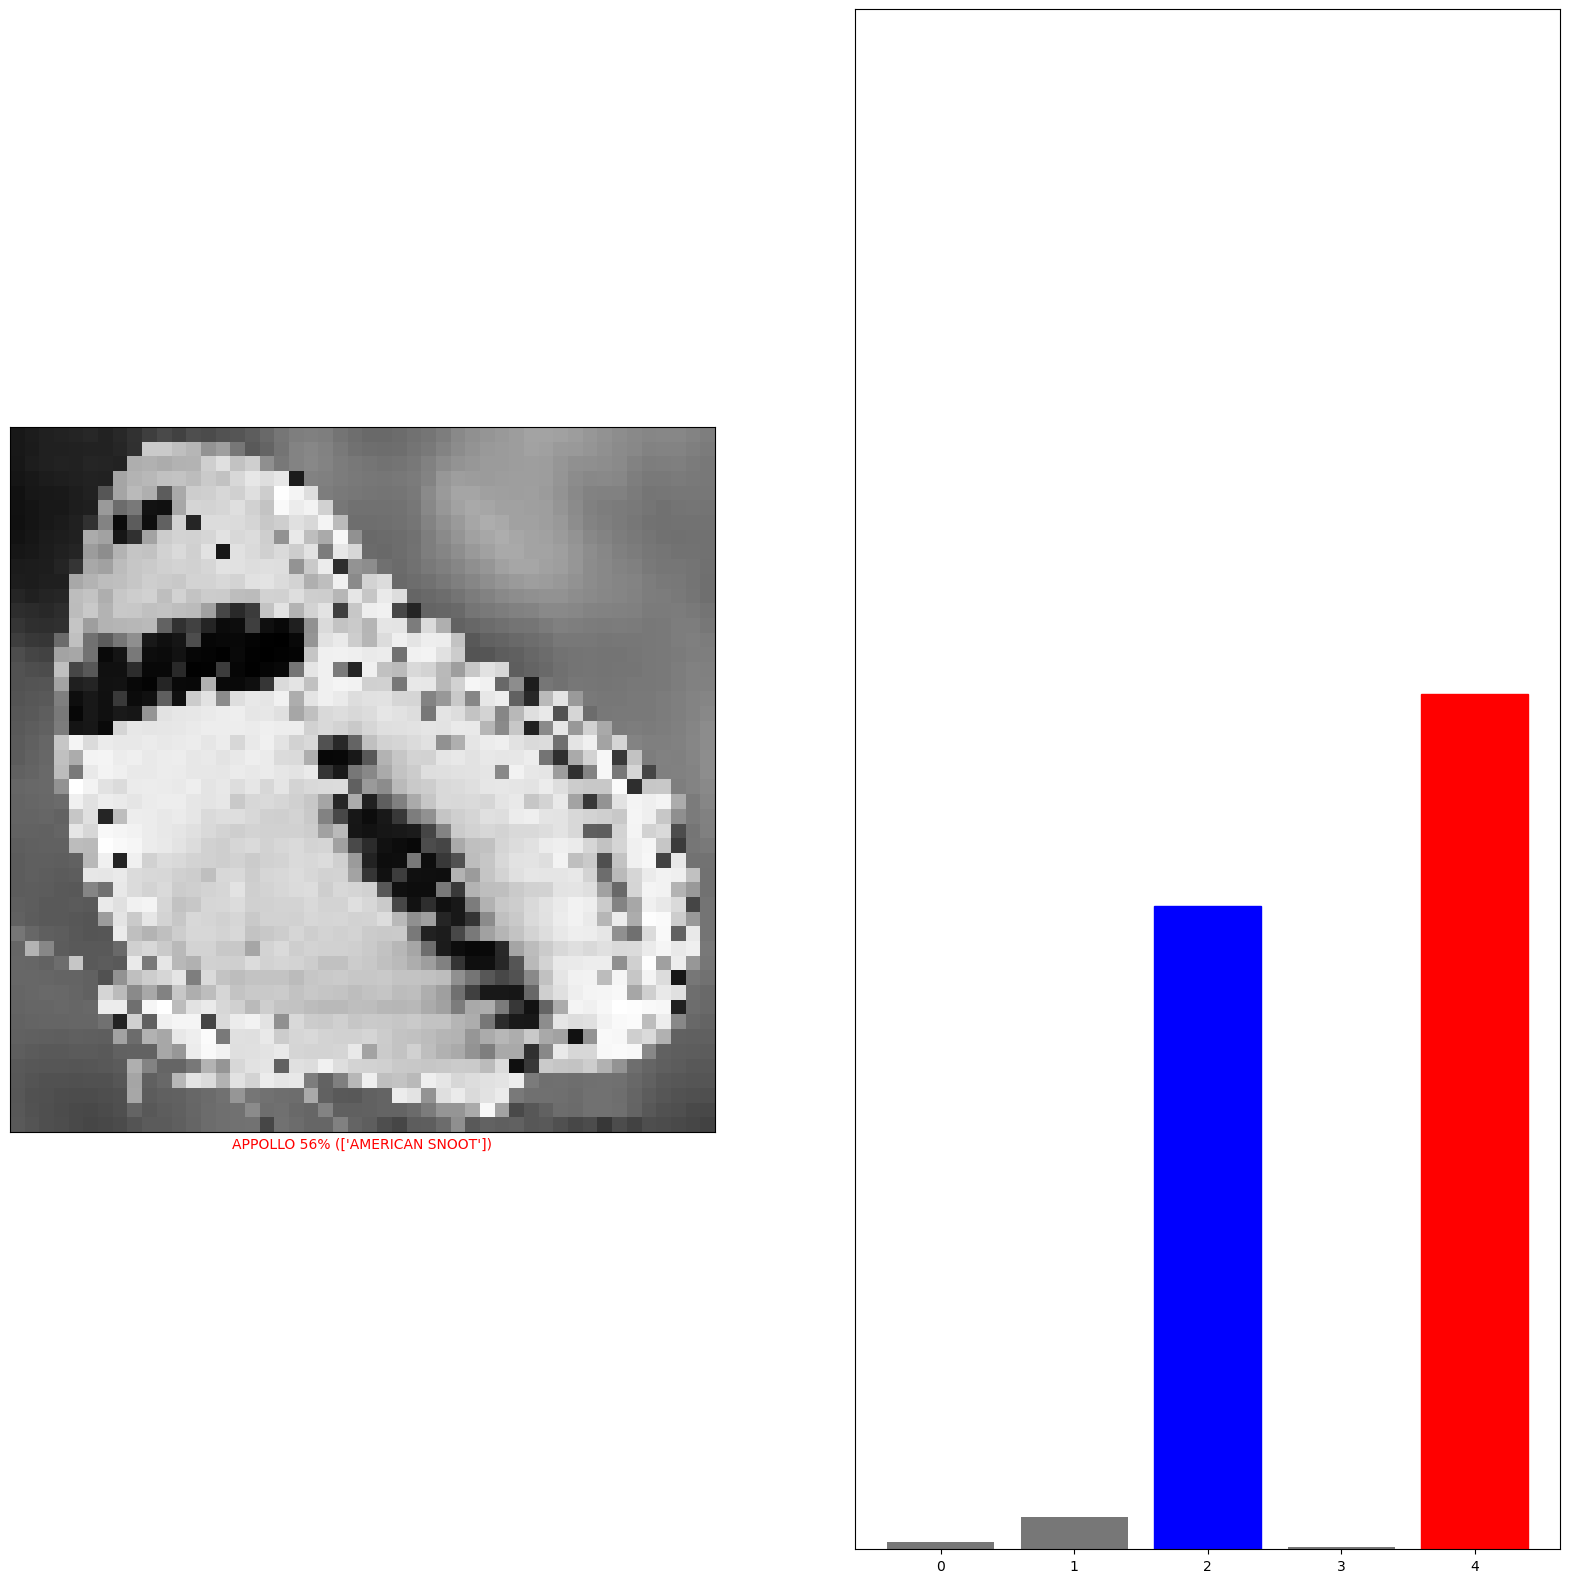

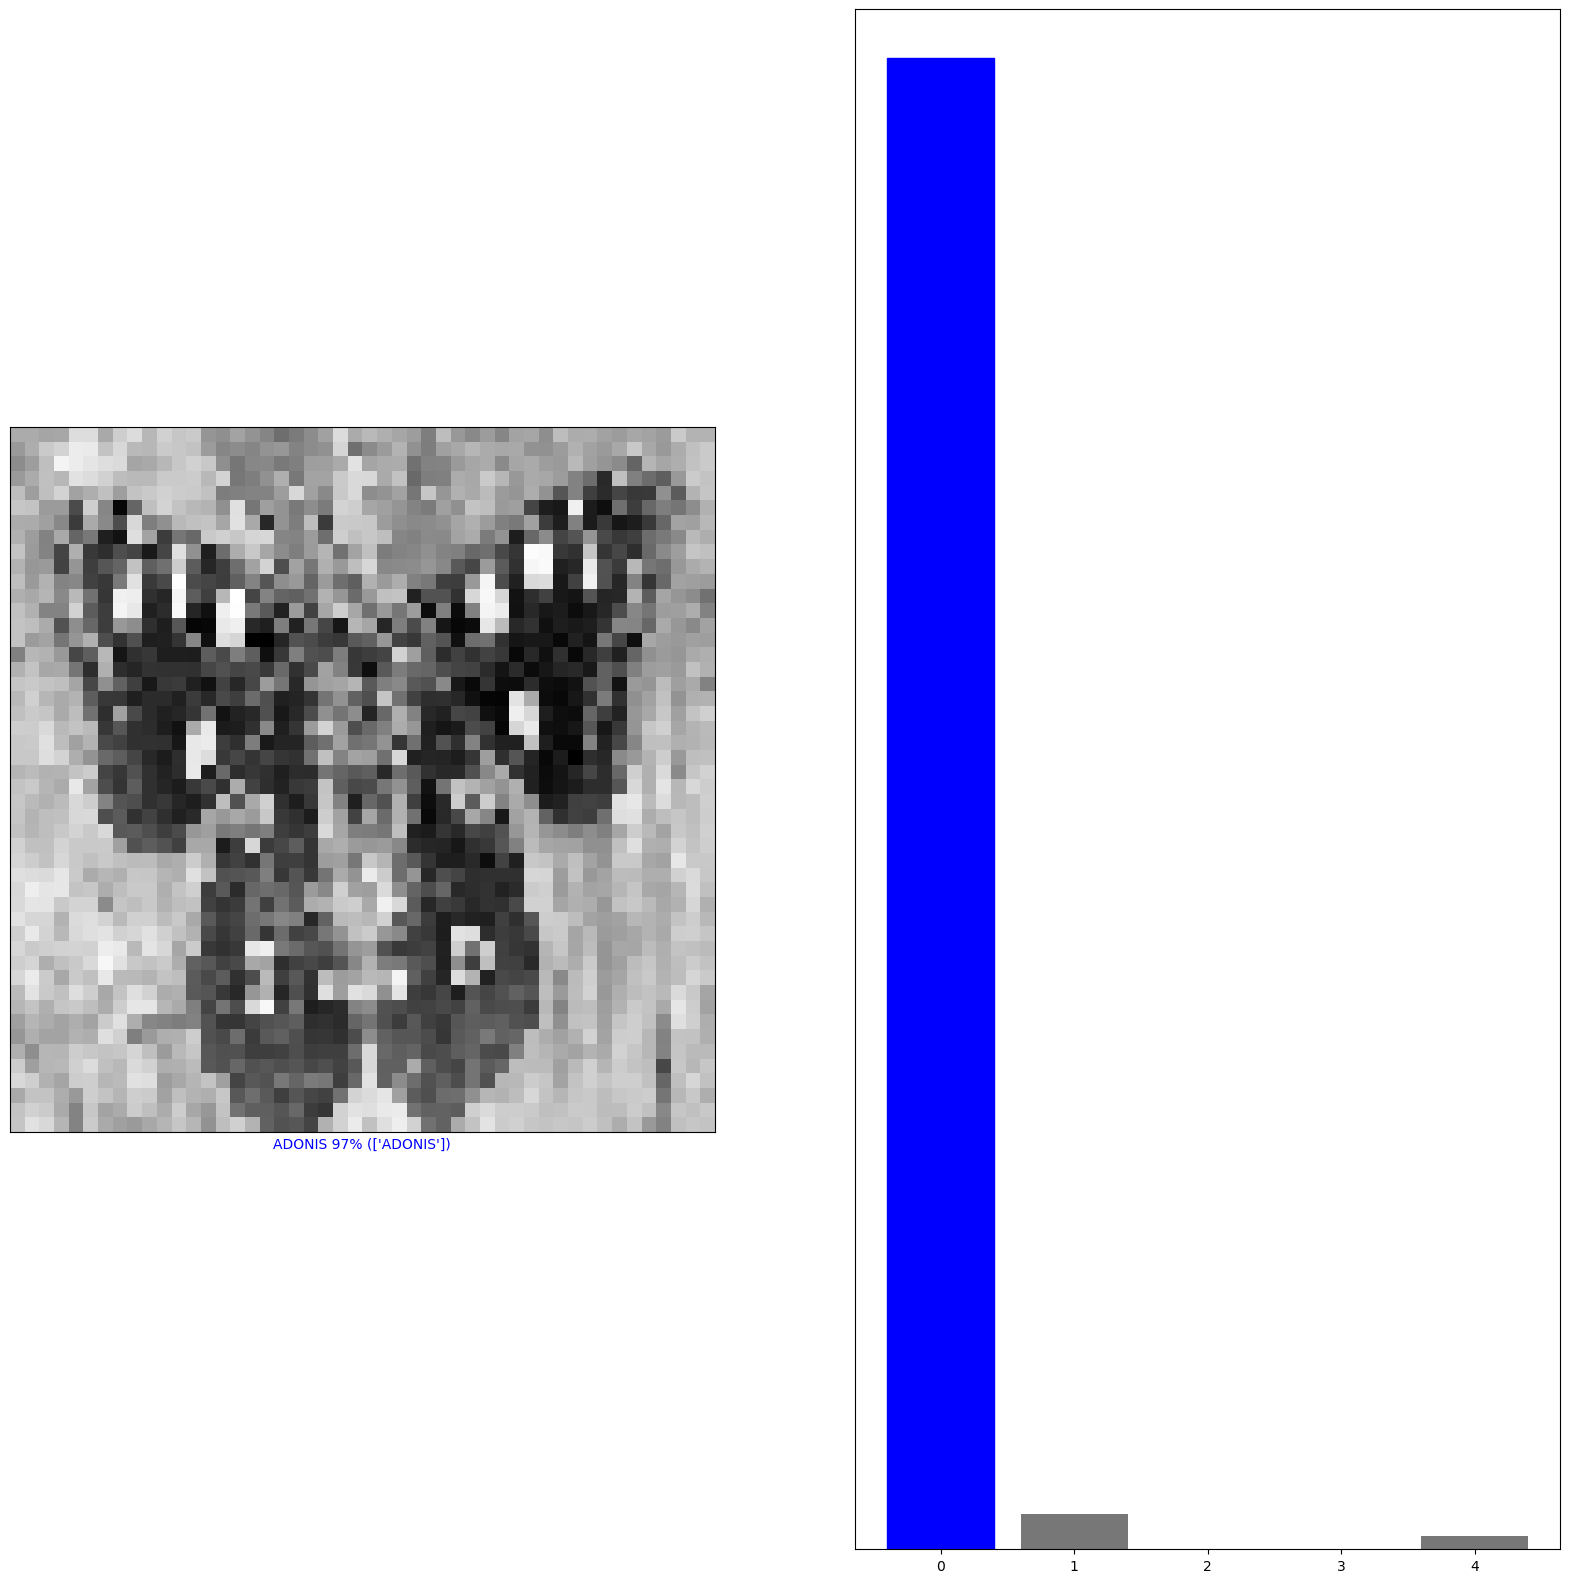

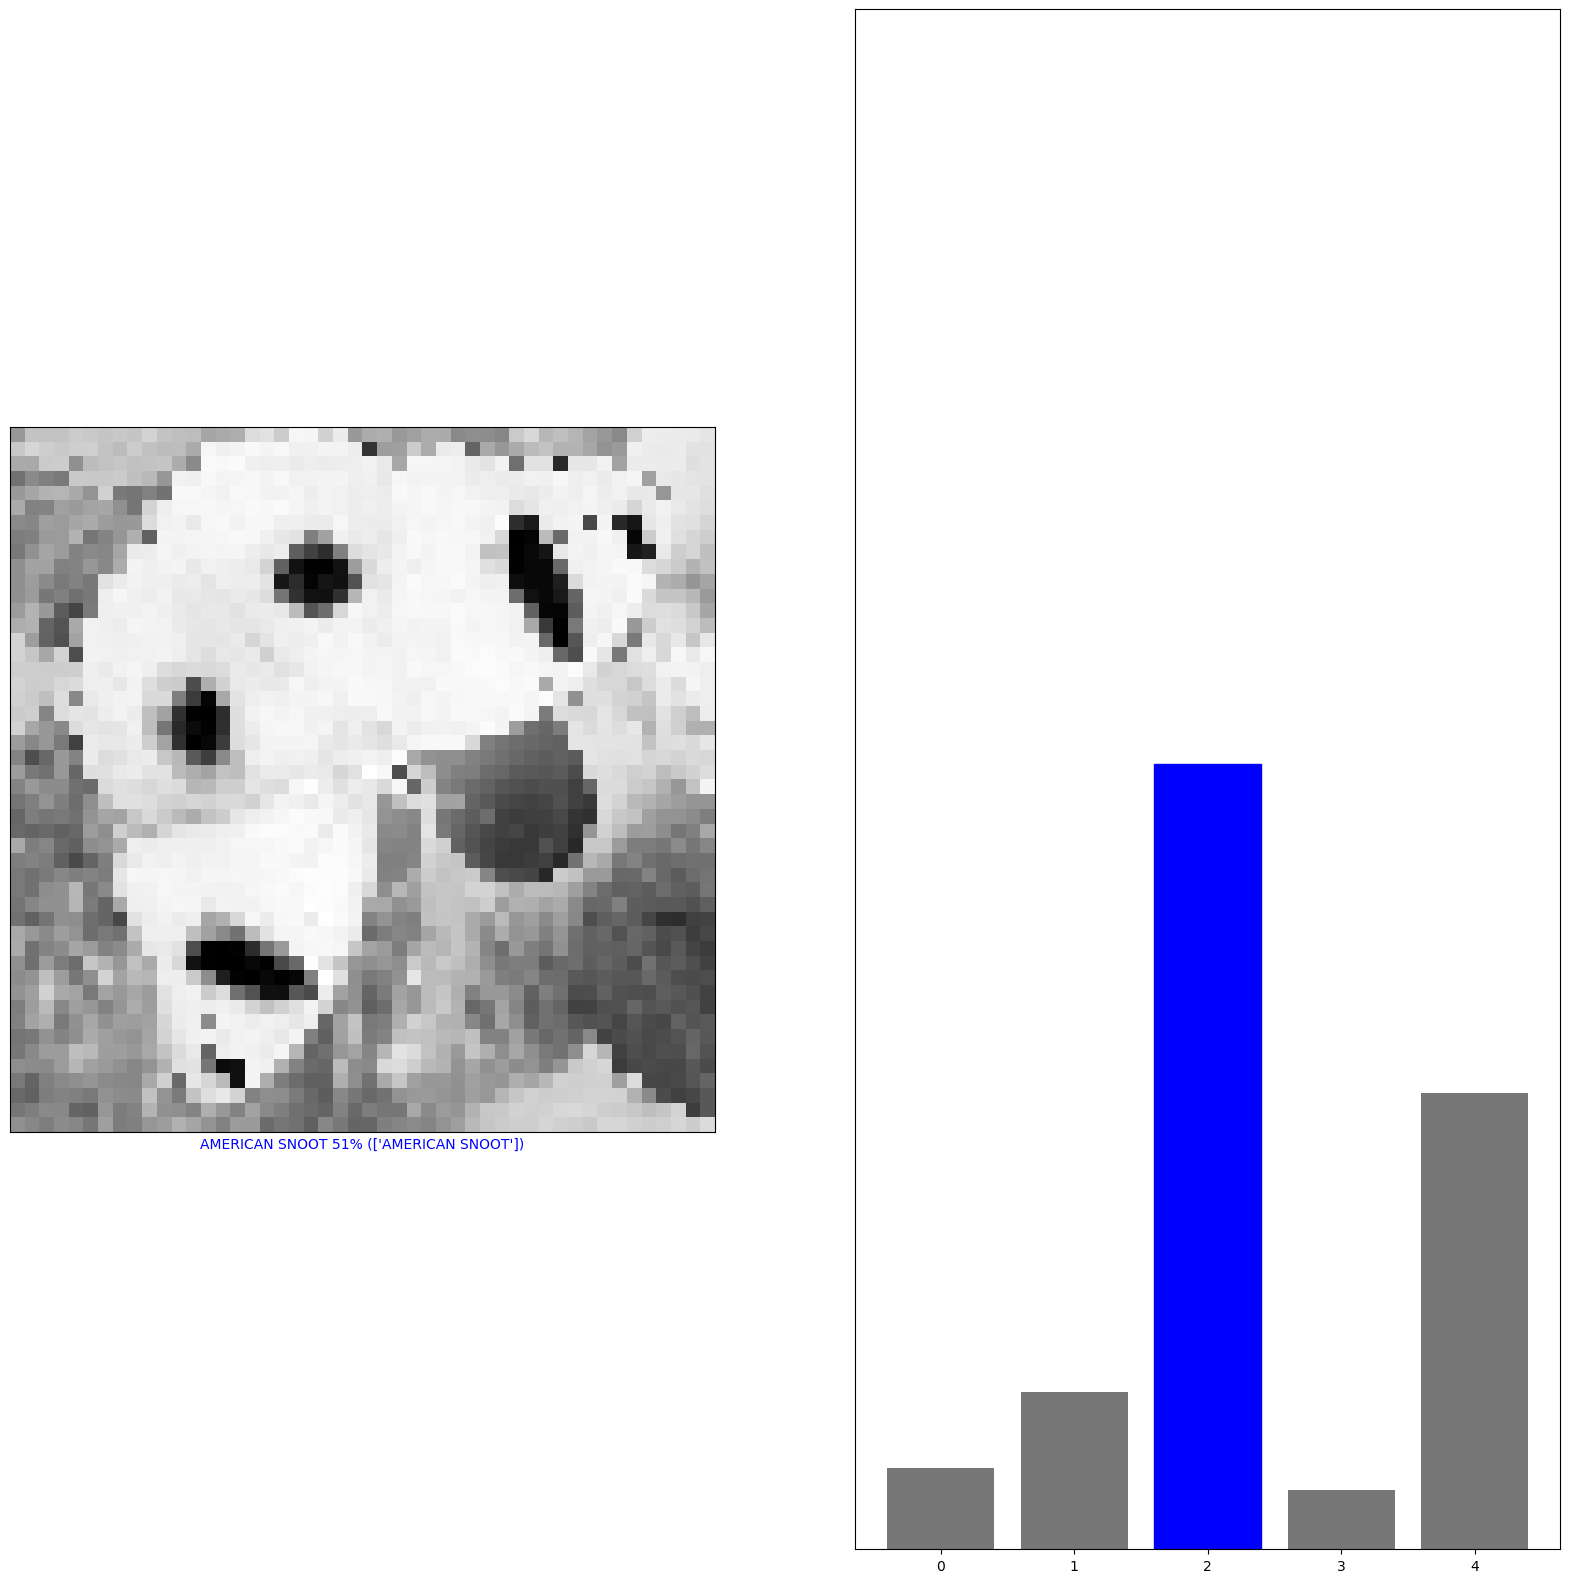

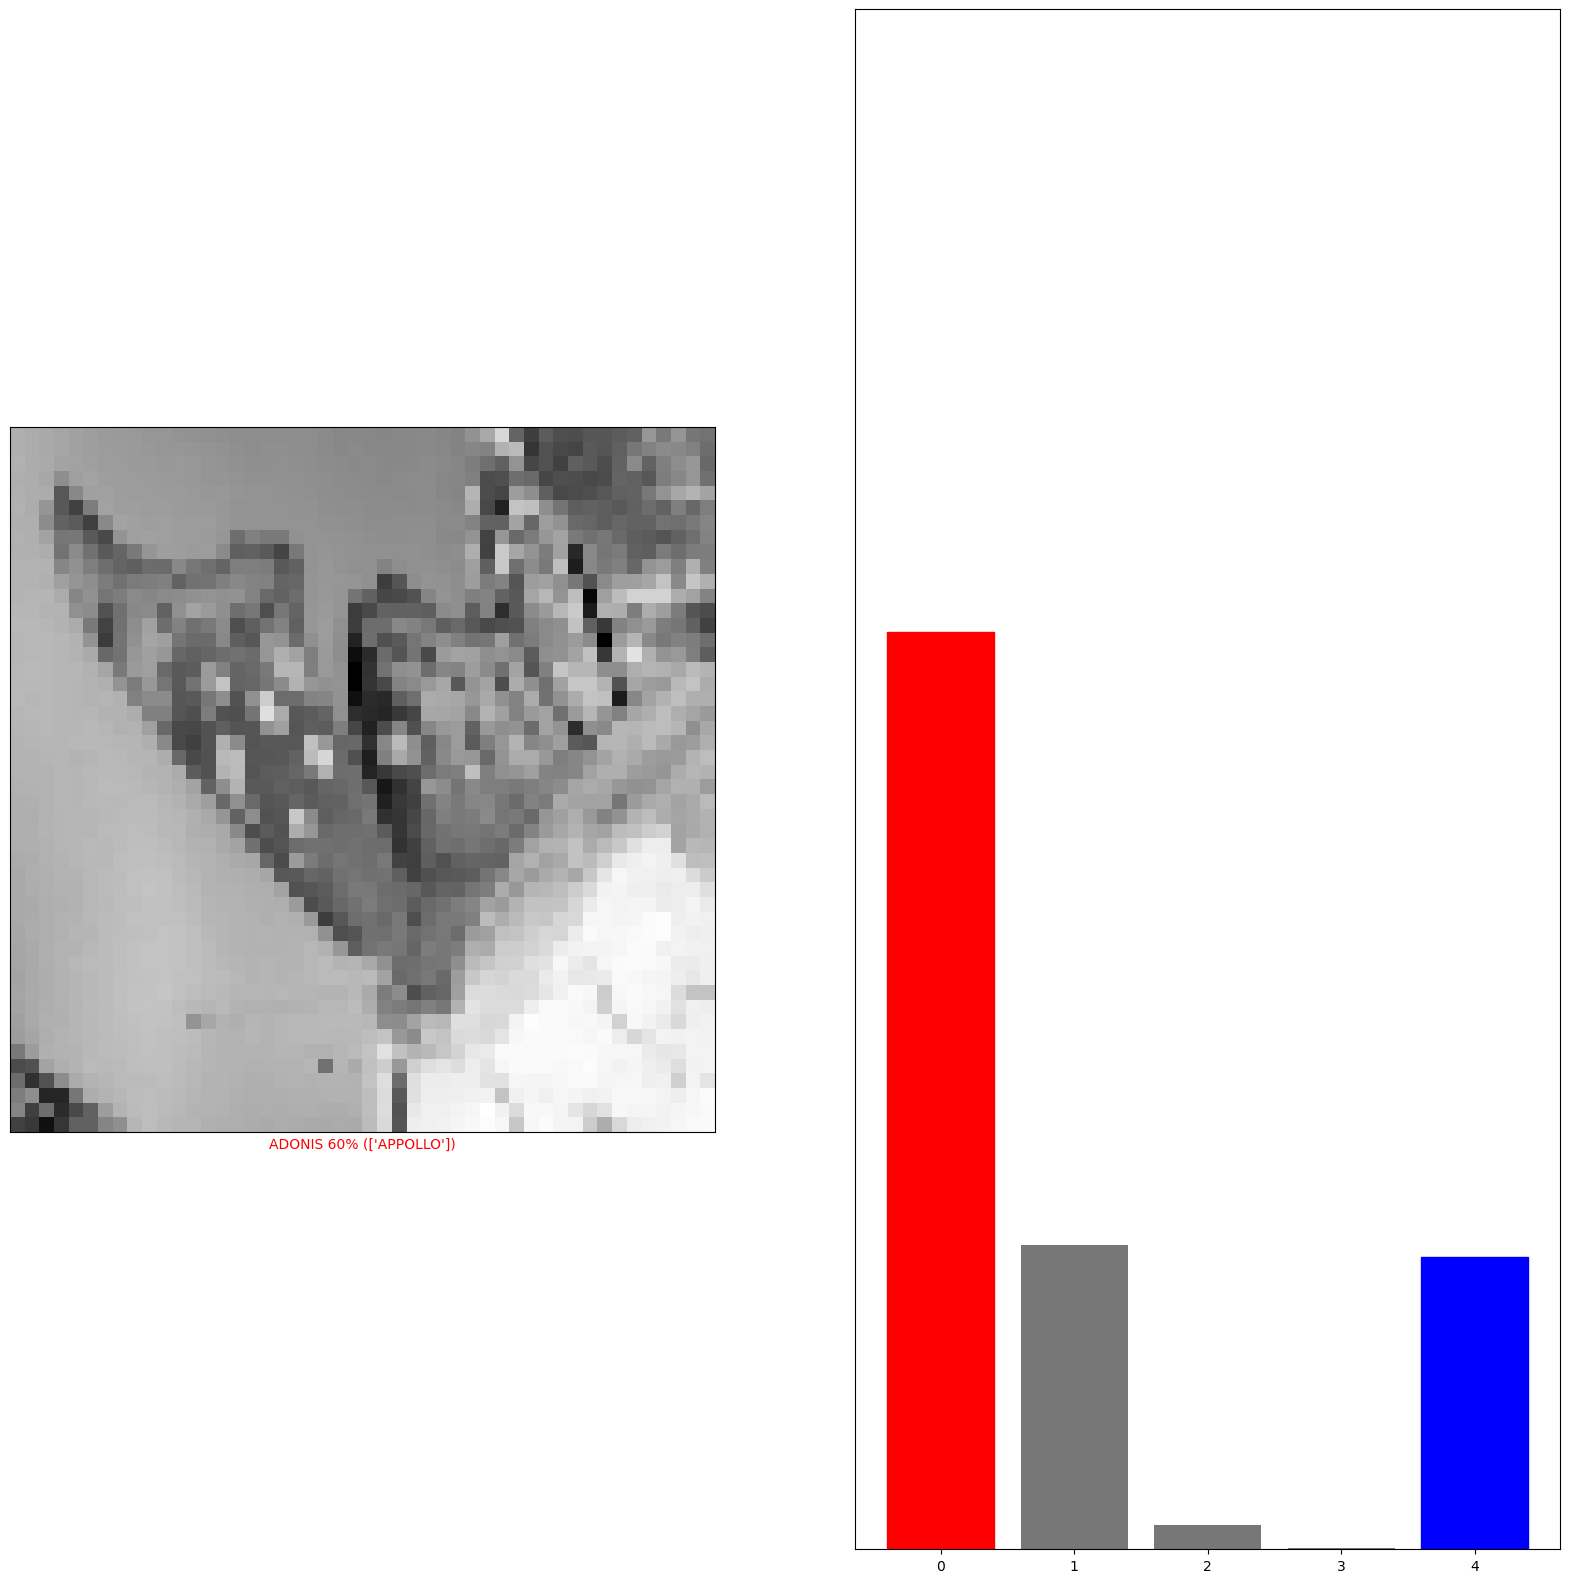

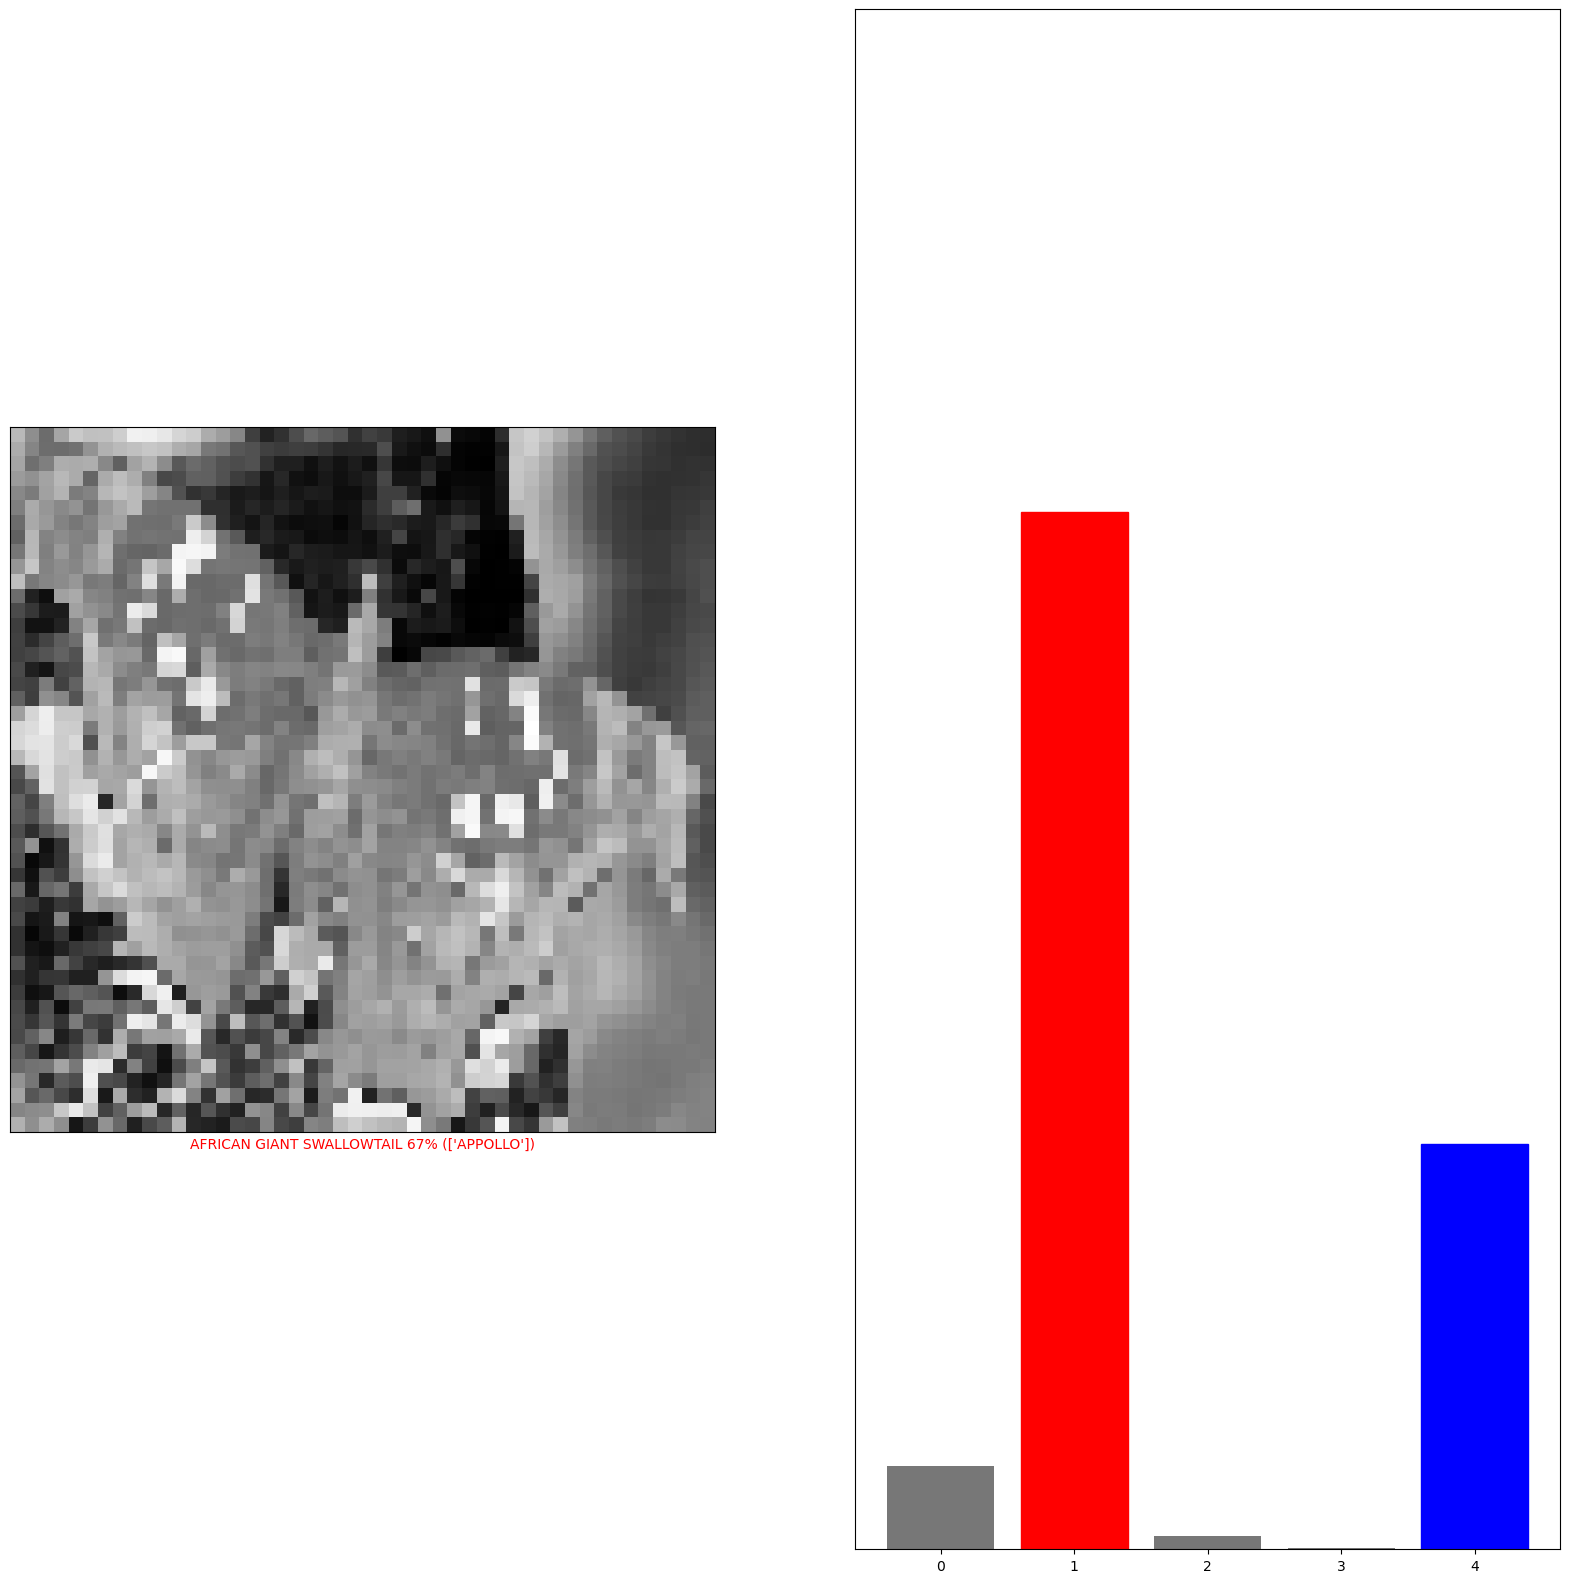

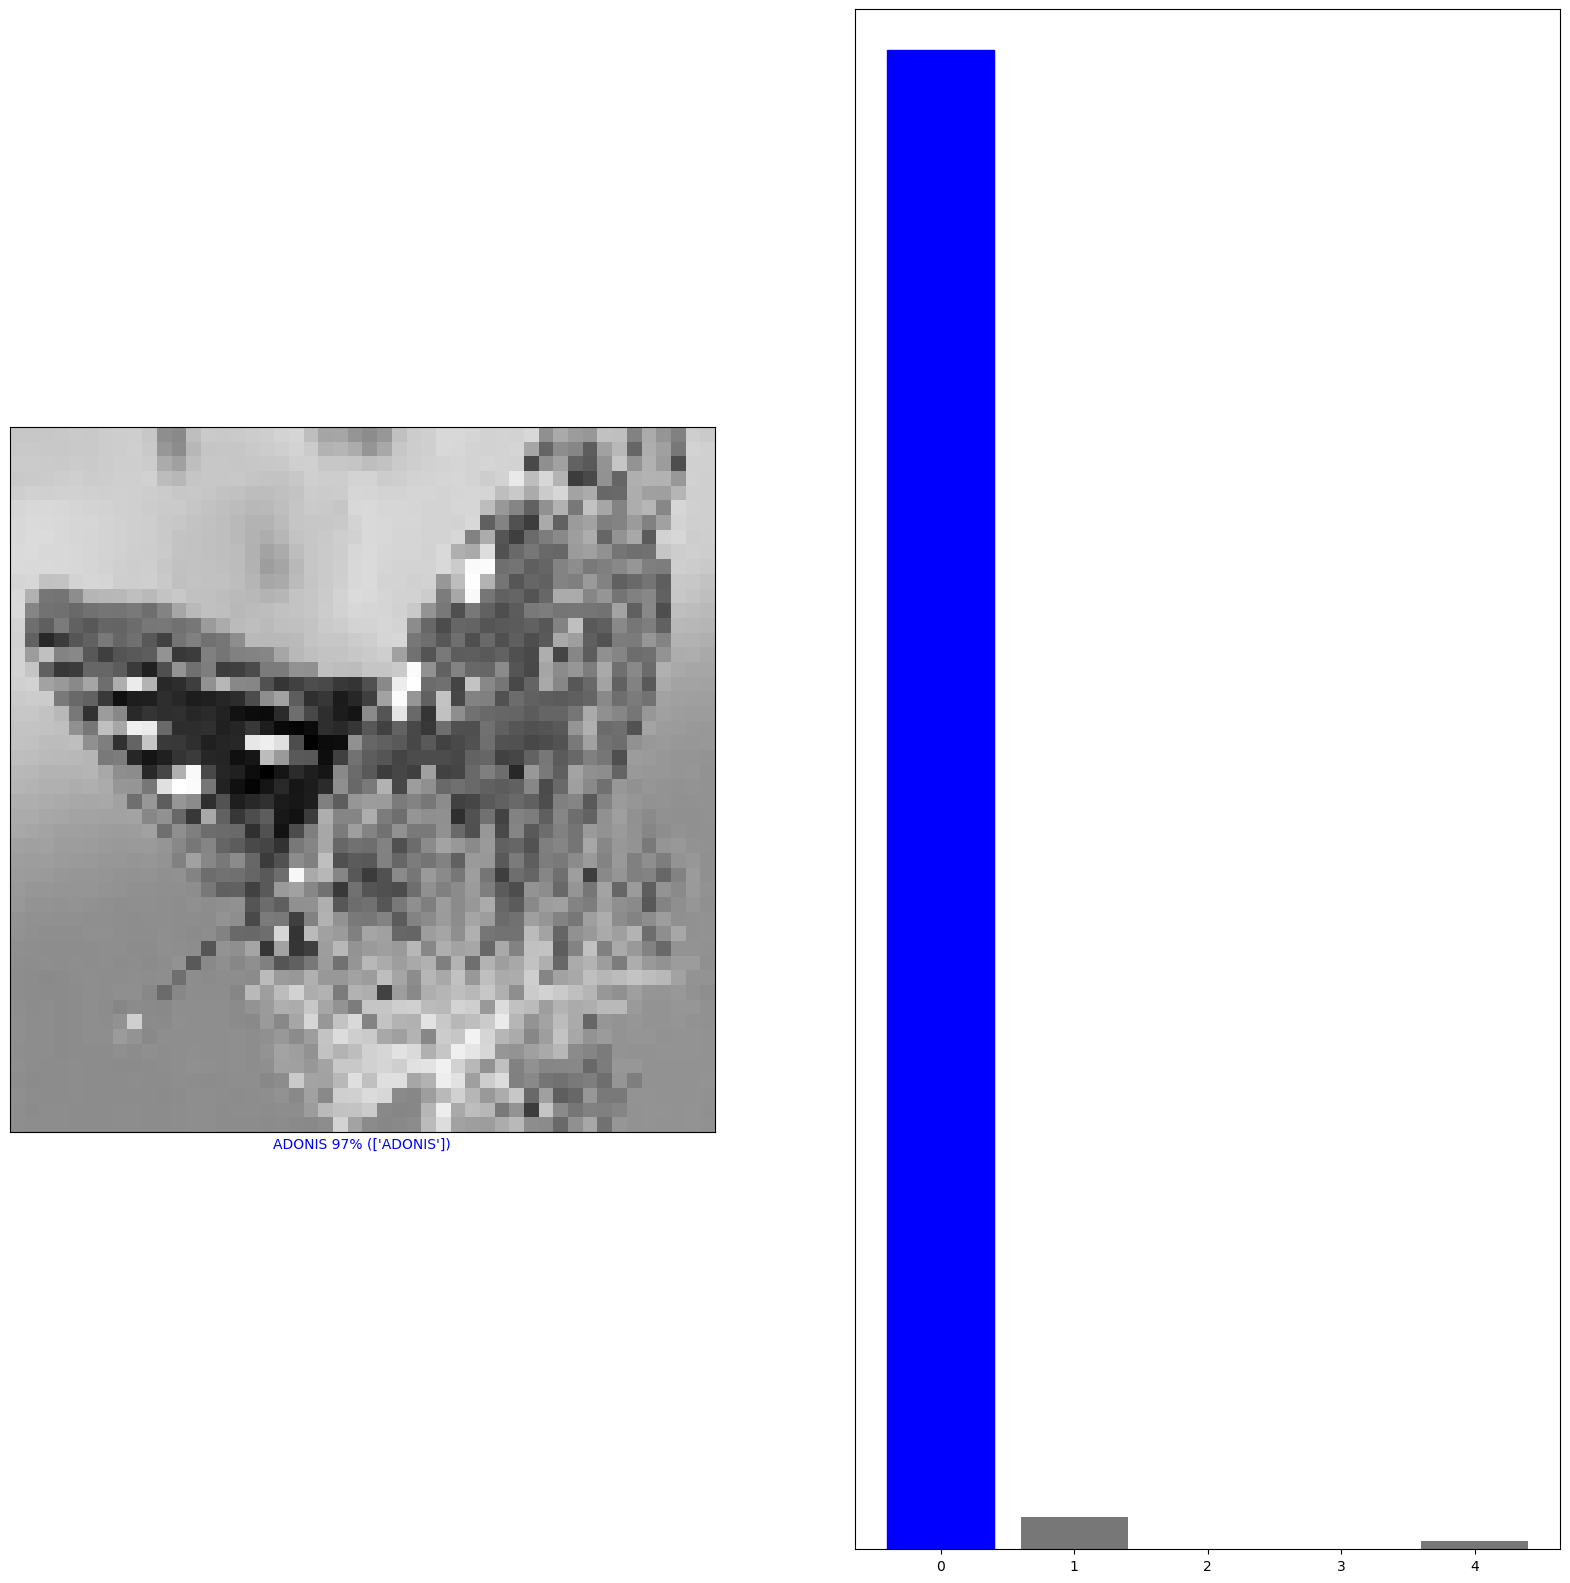

In [99]:
for index in range (6):
    plt.figure(figsize=(20,20))
    plt.subplot(1,2,1)
    plot_image(index, predictions[index], labels_test, Imagens_test)
    plt.subplot(1,2,2)
    plot_value_array(index, predictions[index], labels_test)
    plt.show()